<a href="https://colab.research.google.com/github/CodeMaster092/Machine_Learning/blob/main/HousePrice_Prediction/Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting the housing Data


In [3]:
import pandas as pd
import os
#HOUSING_PATH = os.path.join('c:' + os.sep, 'Users', 'P', 'Desktop', 'Notebooks', 'projects','notebooks','housing.csv')
#def load_housing_data(housing_path = HOUSING_PATH):
   # return pd.read_csv(HOUSING_PATH)
#HOUSING_PATH

In [1]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [6]:
housing = pd.read_csv('housing.csv')

# Getting a Basic Understanding of Data

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ca6bec250>,
      dtype=object)

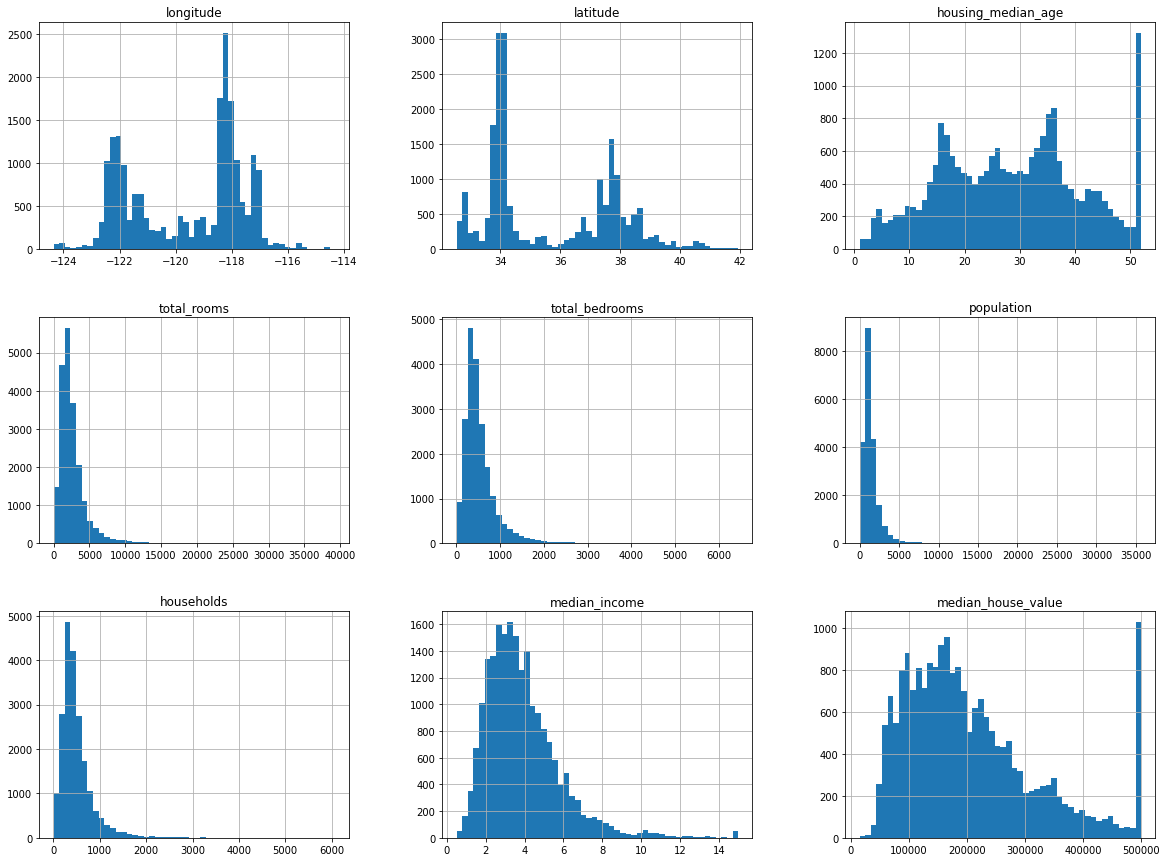

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize= (20,15), histtype = "bar")

# Splitting the data to Train and Test Set.

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
len(train_set), len(test_set)

(16512, 4128)

In [12]:
from zlib import crc32    # we can use train_test_split instead of creating an hash as below function.
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [13]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.5, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1, 2, 3, 4, 5])

In [14]:
housing["income_cat"], housing["median_income"]

(0        5
 1        5
 2        5
 3        4
 4        3
         ..
 20635    2
 20636    2
 20637    2
 20638    2
 20639    2
 Name: income_cat, Length: 20640, dtype: category
 Categories (5, int64): [1 < 2 < 3 < 4 < 5], 0        8.3252
 1        8.3014
 2        7.2574
 3        5.6431
 4        3.8462
           ...  
 20635    1.5603
 20636    2.5568
 20637    1.7000
 20638    1.8672
 20639    2.3886
 Name: median_income, Length: 20640, dtype: float64)

In [15]:
housing.isnull().values.any()  # to know if the dataframe has any Null or NaN values

True

In [16]:
housing = housing.fillna(method = "bfill")   # to fill out the NaN values with the previous values of the coloumn

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
#Stratified random sampling allows researchers to obtain a sample population that best represents the entire population being studied
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350775
2    0.319041
4    0.176357
5    0.114341
1    0.039486
Name: income_cat, dtype: float64

In [19]:
#income_cat has most null values, removing the Coloumn is the best idea
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis = 1, inplace = True)

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20587,-121.60,39.15,19.0,1396.0,336.0,940.0,309.0,1.5208,70300.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
19202,-122.71,38.43,38.0,1689.0,526.0,1071.0,529.0,1.5026,124000.0,<1H OCEAN
5093,-118.29,33.97,43.0,2660.0,672.0,2133.0,588.0,1.7734,107300.0,<1H OCEAN
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
7617,-118.24,33.85,25.0,9594.0,1489.0,5237.0,1496.0,5.9684,193300.0,<1H OCEAN
10788,-117.91,33.64,38.0,2222.0,542.0,1067.0,512.0,2.8553,307600.0,<1H OCEAN
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,243800.0,<1H OCEAN
9357,-122.54,37.96,33.0,2534.0,495.0,996.0,449.0,4.3083,500001.0,NEAR BAY


In [21]:
strat_train_set_copy = strat_train_set.copy()

# Visualizing the Geographical Data


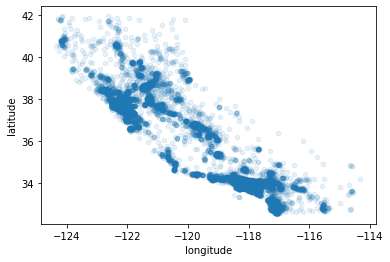

In [22]:
strat_train_set_copy.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
#Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

above plot represents the data according to density and now we can add the median_house_value to the graph

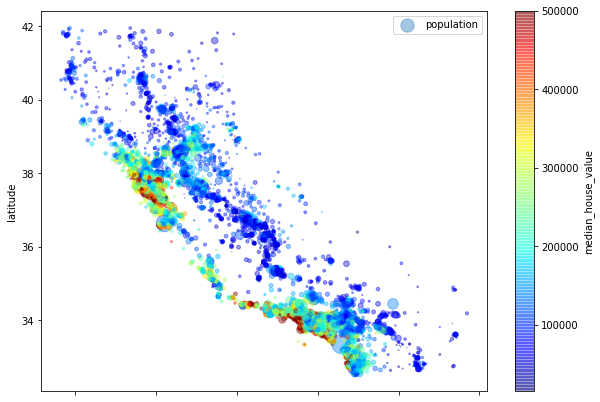

In [23]:
strat_train_set_copy.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
                          s = strat_train_set_copy["population"]/100, label = "population",figsize=(10, 7),
                          c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,)
plt.legend()
# The radius of each circle represents
#the district’s population (option s), and the color represents the price (option c). We
#will use a predefined color map (option cmap) called jet, which ranges from blue
#(low values) to red (high prices)

In [24]:
strat_train_set_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20587,-121.60,39.15,19.0,1396.0,336.0,940.0,309.0,1.5208,70300.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
19202,-122.71,38.43,38.0,1689.0,526.0,1071.0,529.0,1.5026,124000.0,<1H OCEAN
5093,-118.29,33.97,43.0,2660.0,672.0,2133.0,588.0,1.7734,107300.0,<1H OCEAN
19922,-119.35,36.32,10.0,3817.0,719.0,1686.0,714.0,3.8235,94600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
7617,-118.24,33.85,25.0,9594.0,1489.0,5237.0,1496.0,5.9684,193300.0,<1H OCEAN
10788,-117.91,33.64,38.0,2222.0,542.0,1067.0,512.0,2.8553,307600.0,<1H OCEAN
15386,-117.03,33.32,14.0,1088.0,209.0,601.0,193.0,3.8438,243800.0,<1H OCEAN
9357,-122.54,37.96,33.0,2534.0,495.0,996.0,449.0,4.3083,500001.0,NEAR BAY


In [25]:
corr_matrix = strat_train_set_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688916
total_rooms           0.137009
housing_median_age    0.110915
households            0.065447
total_bedrooms        0.050094
population           -0.025906
longitude            -0.048218
latitude             -0.142097
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation.
The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”).

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c9997a1d0>,
      dtype=object)

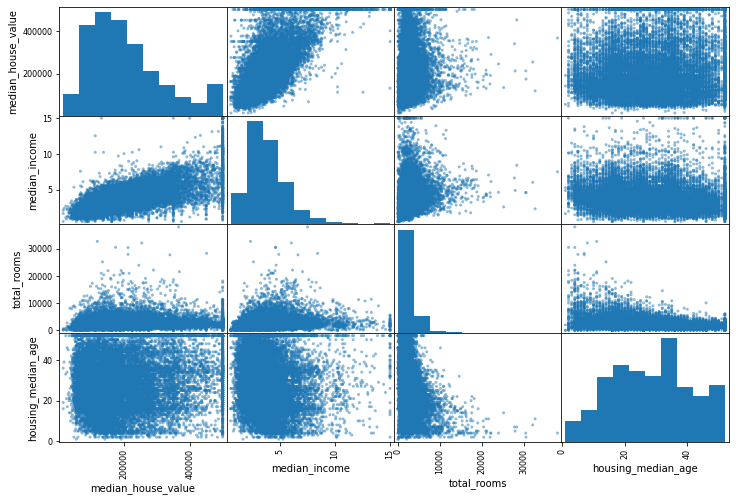

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(strat_train_set_copy[attributes], figsize = (12,8))

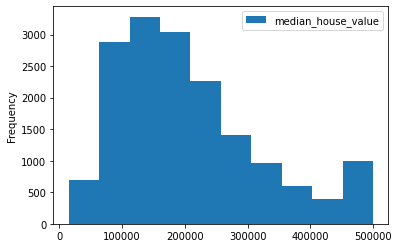

In [27]:
strat_train_set_copy.plot(kind = "hist", y = "median_house_value")

as we can see, The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which would not be very useful. So instead Pandas
displays a histogram of each attribute (other options are available; see Pandas’ documentation
for more details).



The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot

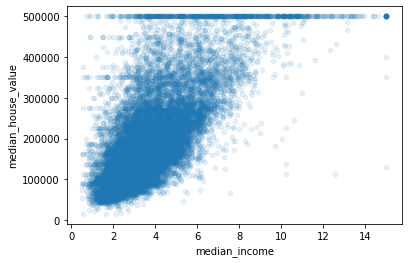

In [28]:
strat_train_set_copy.plot(kind = "scatter", y = "median_house_value", x = "median_income", alpha = 0.1)

## Creating new Useful Features

In [29]:
strat_train_set_copy["rooms_per_household"] = strat_train_set_copy["total_rooms"]/strat_train_set_copy["households"]
strat_train_set_copy["bedrooms_per_room"] = strat_train_set_copy["total_bedrooms"]/strat_train_set_copy["total_rooms"]
strat_train_set_copy["population_per_household"] = strat_train_set_copy["population"]/strat_train_set_copy["households"]

In [30]:
corr_matrix = strat_train_set_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688916
rooms_per_household         0.161863
total_rooms                 0.137009
housing_median_age          0.110915
households                  0.065447
total_bedrooms              0.050094
population_per_household   -0.022261
population                 -0.025906
longitude                  -0.048218
latitude                   -0.142097
bedrooms_per_room          -0.214906
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

But first let’s revert to a clean training set

In [31]:
strat_train_set_copy = strat_train_set.drop("median_house_value", axis= 1)  #  “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.
strat_train_set_copy_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
• Get rid of the corresponding districts.
• Get rid of the whole attribute.
• Set the values to some value (zero, the mean, the median, etc.).

In [32]:
#strat_train_set_copy.dropna(subset=["total_bedrooms"]) # option 1
#strat_train_set_copy.drop("total_bedrooms", axis=1) # option 2
#median = strat_train_set_copy["total_bedrooms"].median() # option 3
#strat_train_set_copy["total_bedrooms"].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer   # Scikit-Learn provides a handy class to take care of missing values: SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [34]:
#Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:
strat_train_set_copy_num = strat_train_set_copy.drop("ocean_proximity", axis=1)

In [35]:
imputer.fit(strat_train_set_copy_num)  #Now you can fit the imputer instance to the training data using the fit() method

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2124.5   ,  434.    , 1161.5   ,
        409.    ,    3.5385])

In [37]:
strat_train_set_copy_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2124.5   ,  434.    , 1161.5   ,
        409.    ,    3.5385])

In [38]:
#Now you can use this “trained” imputer to transform the training set by replacingmissing values by the learned medians:
X = imputer.transform(strat_train_set_copy_num)

In [39]:
strat_train_set_copy_num_tr = pd.DataFrame(X, columns = strat_train_set_copy_num.columns)

# Handling Text and Categorical Attributes

In [40]:
housing_cat = strat_train_set_copy[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
20587,INLAND
15502,NEAR OCEAN
19202,<1H OCEAN
5093,<1H OCEAN
19922,INLAND
14081,NEAR OCEAN
18125,<1H OCEAN
5830,<1H OCEAN
5652,NEAR OCEAN
502,NEAR BAY


Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert
these categories from text to numbers.

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [0.],
       ...,
       [0.],
       [3.],
       [3.]])


There are two common ways to get all attributes to have the same scale: 
min-max scaling(normalization) and standardization.

Data normalisation (also known as scaling or min-max scaling) is used to standardise the range of features of data. Data values can be infinite, but through normalisation, each feature falls between a range of 0 to 1. The outcome is that data can be visualised and described using a normal distribution (a bell curve), where roughly the same number of observations fall above and below the mean.

Standardisation (or z-score normalisation) transforms data such that the distribution has a mean of 0 and a standard deviation of 1. Neural networks, logistics regression and SVM use z-score normalisation.

**Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1)**

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm. As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

but the best way is one hot enoding


In [43]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: fit() (returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class.

Duck typing. This term comes from the saying “If it walks like a duck, and it quacks like a duck, then it must be a duck.” (There are other variations).

Duck typing is a concept related to dynamic typing, where the type or the class of an object is less important than the methods it defines. When you use duck typing, you do not check types at all. Instead, you check for the presence of a given method or attribute.

**Transformer transforms the input data ( X ) in some ways. Estimator predicts a new value (or values) ( y ) by using the input data ( X ).**

In [46]:
#here is a small transformer class that adds the combined attributes we discussed earlier:

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs
# some doubt in it

array([[-122.23, 37.88, 41.0, ..., 5, 6.984126984126984,
        2.5555555555555554],
       [-122.22, 37.86, 21.0, ..., 5, 6.238137082601054,
        2.109841827768014],
       [-122.24, 37.85, 52.0, ..., 5, 8.288135593220339,
        2.8022598870056497],
       ...,
       [-121.22, 39.43, 17.0, ..., 2, 5.20554272517321,
        2.325635103926097],
       [-121.32, 39.43, 18.0, ..., 2, 5.329512893982808,
        2.1232091690544412],
       [-121.24, 39.37, 16.0, ..., 2, 5.254716981132075,
        2.616981132075472]], dtype=object)

# Transformation Pipelines
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scalar', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(strat_train_set_copy_num)
housing_num_tr

# now this pipeline handled only numerical attributes but we can handle both categorical and numerical attributes after version 0.20 o scikit learn

array([[-1.01031270e+00,  1.64219526e+00, -7.68118406e-01, ...,
        -3.67477311e-01, -5.38725640e-03,  3.81825587e-01],
       [ 1.17165458e+00, -1.19265849e+00, -1.72228434e+00, ...,
         6.14790357e-01, -4.14437692e-02, -7.60775199e-01],
       [-1.56454237e+00,  1.30538095e+00,  7.42644318e-01, ...,
        -9.07674189e-01, -9.30777909e-02,  1.39249505e+00],
       ...,
       [ 1.27151579e+00, -1.08506503e+00, -1.16568754e+00, ...,
         8.89466295e-02,  8.10864443e-04, -3.12422323e-01],
       [-1.47966035e+00,  1.08551606e+00,  3.45075180e-01, ...,
         9.15342518e-02, -7.63852364e-02, -2.66020977e-01],
       [-1.36481997e+00,  1.24924524e+00,  2.65561352e-01, ...,
         1.41048777e-01, -4.15966554e-02, -5.17723844e-01]])

In [48]:
#Handling both categorical and numerial attributes
from sklearn.compose import ColumnTransformer

num_attribs = list(strat_train_set_copy_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(strat_train_set_copy)
housing_prepared

array([[-1.0103127 ,  1.64219526, -0.76811841, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17165458, -1.19265849, -1.72228434, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56454237,  1.30538095,  0.74264432, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.27151579, -1.08506503, -1.16568754, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47966035,  1.08551606,  0.34507518, ...,  0.        ,
         1.        ,  0.        ],
       [-1.36481997,  1.24924524,  0.26556135, ...,  0.        ,
         1.        ,  0.        ]])

# Select and Train a Model

# Training and Evaluating the Training Set

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, strat_train_set_copy_labels)

LinearRegression()

In [50]:
some_data = strat_train_set_copy.iloc[:5]  #iloc can be used to select specific data from a dataframe
some_labels = strat_train_set_copy_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions', lin_reg.predict(some_data_prepared))
print('labels', list(some_labels))

predictions [ 37904.9070568  304855.98181721 175385.34402174 148463.28195611
 148442.41866364]
labels [70300.0, 279600.0, 124000.0, 107300.0, 94600.0]


In [51]:
# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(lin_reg.predict(housing_prepared), strat_train_set_copy_labels)  #labels should be 1st parameter and predictions be 2nd parameter
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68225.96115219031

In [52]:
# Let's train DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, strat_train_set_copy_labels)

DecisionTreeRegressor()

In [53]:
#Evaluate it
tree_mse = mean_squared_error(tree_reg.predict(housing_prepared), strat_train_set_copy_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Better Evaluation Using Cross-Validation

A great alternative for train_test_split is to use Scikit-Learn’s K-fold cross-validation feature. The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing
the 10 evaluation scores:

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, strat_train_set_copy_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)


In [55]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:",scores.std())
    

In [56]:
display_scores(tree_rmse_scores)

Scores: [69148.13791969 69550.28002371 71997.89817188 70500.27831811
 70371.34332352 68997.93701951 69857.34317646 72658.49974552
 68949.613041   68403.18911659]
Mean: 70043.45198559943
Std: 1305.1447245123852


In [57]:
#now check the scores for linear reg model
lin_scores = cross_val_score(lin_reg, housing_prepared, strat_train_set_copy_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66276.91617313 66856.10016663 66945.70361274 70714.79749255
 72470.83592083 69161.64470986 67030.7901348  69338.37749145
 70529.35406859 66165.80399453]
Mean: 68549.03237651128
Std: 2087.466091281052


earlier we found that there was error was zero for deciscion tree model . So we can say that the Decision Tree model is overfitting so badly that it performs worsethan the Linear Regression model.

In [58]:
#now trying RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, strat_train_set_copy_labels)

RandomForestRegressor()

In [59]:
#Evaluate it
forest_mse = mean_squared_error(forest_reg.predict(housing_prepared), strat_train_set_copy_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18531.593709086395

In [60]:
forest_scores = cross_val_score(forest_reg, housing_prepared, strat_train_set_copy_labels, scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_sores = np.sqrt(-forest_scores)
display_scores(forest_rmse_sores)

Scores: [47383.4633753  49854.53192771 49920.45152274 49204.4787841
 51677.17007355 46746.42492193 50188.86879259 50272.02734745
 51361.48946587 49085.46937122]
Mean: 49569.43755824564
Std: 1478.2119959814415


this model is much better than previous models

In [61]:
#saving the model
import joblib
joblib.dump(forest_reg, "forest_reg.pkl")


['forest_reg.pkl']

In [62]:
forest_reg_loaded = joblib.load("forest_reg.pkl")
forest_reg_loaded

RandomForestRegressor()

# Fine tune your model
 one way is to manually change hyper parameters, but we can use scikit-Learn's GridSearchCV
 

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
             {'bootstrap': [False],'n_estimators': [3,10], 'max_features': [2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, strat_train_set_copy_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63383.18307302382 {'max_features': 2, 'n_estimators': 3}
54603.04034363058 {'max_features': 2, 'n_estimators': 10}
52191.76764464531 {'max_features': 2, 'n_estimators': 30}
59888.28117496059 {'max_features': 4, 'n_estimators': 3}
52197.12102763179 {'max_features': 4, 'n_estimators': 10}
49813.07049221091 {'max_features': 4, 'n_estimators': 30}
58369.229725217534 {'max_features': 6, 'n_estimators': 3}
51605.5790162582 {'max_features': 6, 'n_estimators': 10}
49406.18649589356 {'max_features': 6, 'n_estimators': 30}
57784.99146666801 {'max_features': 8, 'n_estimators': 3}
51658.522619616815 {'max_features': 8, 'n_estimators': 10}
49575.66057055336 {'max_features': 8, 'n_estimators': 30}
61721.03174954044 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53930.435113502936 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59655.63773912596 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51750.364578958426 {'bootstrap': False, 'max_features': 3, 'n_estimators':

# Analyzing the Best Models and their errors

In [67]:
feature_importances= grid_search.best_estimator_.feature_importances_
feature_importances

array([8.37201579e-02, 7.04361319e-02, 3.91065062e-02, 1.69775748e-02,
       1.56416377e-02, 1.66326652e-02, 1.55760180e-02, 2.96292179e-01,
       7.91311738e-02, 1.05506983e-01, 6.26597967e-02, 1.94107754e-02,
       1.69211347e-01, 1.65856190e-04, 4.48318351e-03, 5.04801500e-03])

In [68]:
 # the values along with the coloumn name
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)


[(0.2962921786702342, 'median_income'),
 (0.16921134654139677, 'INLAND'),
 (0.10550698260796687, 'pop_per_hhold'),
 (0.0837201578688836, 'longitude'),
 (0.07913117384055178, 'rooms_per_hhold'),
 (0.07043613185381618, 'latitude'),
 (0.06265979666380736, 'bedrooms_per_room'),
 (0.03910650620269434, 'housing_median_age'),
 (0.019410775354641942, '<1H OCEAN'),
 (0.016977574750657237, 'total_rooms'),
 (0.016632665229104372, 'population'),
 (0.01564163768130154, 'total_bedrooms'),
 (0.01557601803482972, 'households'),
 (0.0050480150034835775, 'NEAR OCEAN'),
 (0.0044831835064837065, 'NEAR BAY'),
 (0.00016585619014685554, 'ISLAND')]

# Evaluating the System with Test Data

In [69]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


49582.140933500195

In [87]:
np.expand_dims(some_data_prepared[1,:], axis = 0)

array([[ 1.17165458, -1.19265849, -1.72228434,  1.26366105,  0.76829261,
         0.52560444,  0.71421025,  1.29272574,  0.61479036, -0.04144377,
        -0.7607752 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [95]:
some_labels

20587     70300.0
15502    279600.0
19202    124000.0
5093     107300.0
19922     94600.0
Name: median_house_value, dtype: float64

In [98]:
print('predictions', final_model.predict(np.expand_dims(some_data_prepared[3,:], axis=0)))
print('labels', some_labels[19202])

predictions [107940.]
labels 124000.0


In [100]:
max(strat_test_set["median_house_value"]), min(strat_test_set["median_house_value"])

(500001.0, 14999.0)

In [72]:
print('predictions', lin_reg.predict(some_data_prepared))
print('labels', list(some_labels))

predictions [ 37904.9070568  304855.98181721 175385.34402174 148463.28195611
 148442.41866364]
labels [70300.0, 279600.0, 124000.0, 107300.0, 94600.0]


there is improvement possible as the difference as the error in predition is still higher.